In [1]:
# Libraries Importation

import numpy as np
import tensorflow as tf
import os
import pickle
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# Load the pretrained model we will use
model = VGG16(weights='imagenet', include_top=False)

# Function to extract the features from an image using the VGG16 model
def extract_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features = features.flatten()
    return features

In [3]:
# Store Image Paths

dataset_path = "/dataset/images/"
image_paths = list()
count = 0
for image_file in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, image_file)
    image_paths.append(image_path)
    count+=1
    
count

44441

In [4]:
# Load the dataset of images and extract features for each image
features = []
for path in image_paths:
    features.append(extract_features(path))
    
# Convert features to numpy array
features = np.array(features)
print("Done!")

Done!


In [5]:
# Store feature vectors in a database file as well as images paths
database_dl_images_embeddings = {}
count = 0
for image_file in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, image_file)
    features = extract_features(image_path)
    database_dl_images_embeddings[image_path] = features
    count+=1
    
print("Done")

# Save the embeddings as pickle file for later use
with open('database_dl_images_embeddings_full.pickle', 'wb') as handle:
    pickle.dump(database_dl_images_embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# Load saved pickle file
#with open('database_dl_images_embeddings.pickle', 'rb') as handle:
   # data_embeddings = pickle.load(handle)

Done


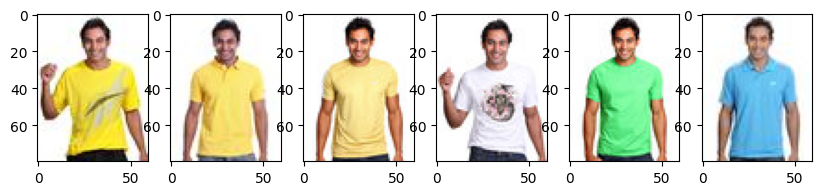

In [14]:
#Build NearestNeighbors model and fit to features
nn_model = NearestNeighbors(n_neighbors=6, metric='cosine')
nn_model.fit(features)

# Function to perform image similar search
def search_similar_images(query_path, image_paths):
    # Extract features for query image
    query_features = extract_features(query_path)

    # Find most similar images using NearestNeighbors model
    distances, indices = nn_model.kneighbors([query_features])
    similar_images = [image_paths[i] for i in indices.flatten()]

    return similar_images

# Example usage
query_path = 'C:/Users/savadogo_abdoul/Desktop/Learn/image_search_similarities/data_subset/2345.jpg'
similar_images = search_similar_images(query_path, image_paths)

# Load the images
img0 = plt.imread(similar_images[0])
img1 = plt.imread(similar_images[1])
img2 = plt.imread(similar_images[2])
img3 = plt.imread(similar_images[3])
img4 = plt.imread(similar_images[4])
img5 = plt.imread(similar_images[5])

# Display the images in a grid
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10,2))
axes[0].imshow(img0)
axes[1].imshow(img1)
axes[2].imshow(img2)
axes[3].imshow(img3)
axes[4].imshow(img4)
axes[5].imshow(img5)
plt.show()